In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from math import pi
from pandas.plotting import parallel_coordinates

df = pd.read_csv("../datasets/nba2021_advanced.csv")

df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [13]:
# 히트맵 시각화 V1을 위한 데이터 전처리

# 5개 팀만 필터링

df1 = df[df['Tm'].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]

# 6개 칼럼만 필터링
df1 = df1[['Tm', 'ORB%', 'TRB%', 'AST%', 'BLK%', 'USG%']]

# 팀별 요소 평균 전처리
df1 = df1.groupby('Tm').mean()
df1.head()

,ORB%,TRB%,AST%,BLK%,USG%
Tm,,,,,
ATL,5.250000,10.400000,13.893750,1.718750,18.412500
BOS,5.681250,10.362500,12.881250,2.437500,18.325000
BRK,4.394737,10.547368,15.210526,2.147368,18.868421
CHI,4.482353,10.976471,13.500000,1.405882,17.582353
CHO,7.628571,11.742857,14.900000,2.764286,19.357143


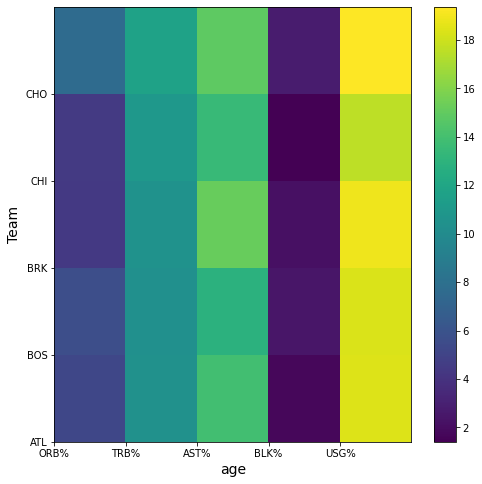

In [14]:
# 히트맵 시각화 V1

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

plt.pcolor(df1.values)

# x,y축 칼럼 설정
plt.xticks(range(len(df1.columns)), df1.columns)
plt.yticks(range(len(df1.index)), df1.index)

# x,y축 레이블 설정
plt.xlabel('age', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.colorbar()
plt.show()

In [18]:
# 히트맵 시각화 V2를 위한 데이터 전처리

# 5개 팀만 필터링
df2 = df[df['Tm'].isin(['ATL', 'BOS', 'BRK', 'CHI', 'CHO'])]

# 팀명, 연령, 참여 게임 수 칼럼만 필터링
df2 = df2[['Tm', 'Age', 'G']]

# 팀 - 연령 기준 평균으로 전처리
df2 = df2.groupby(['Tm', 'Age']).mean().reset_index()

# 테이블 피벗
df2 = df2.pivot(index='Tm', columns='Age', values='G')
df2.head()

Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34
Tm,,,,,,,,,,,,,,,
ATL,NaN,9.0,24.0,23.000000,16.250000,NaN,22.000000,25.0,NaN,9.0,21.5,NaN,NaN,16.0,14.0
BOS,NaN,NaN,13.0,20.000000,17.333333,26.0,6.000000,22.0,18.0,26.0,26.0,13.0,NaN,23.0,NaN
BRK,NaN,14.0,NaN,8.500000,26.000000,26.0,15.000000,12.0,3.0,16.5,30.0,NaN,16.0,23.5,30.0
CHI,26.0,27.0,8.5,15.000000,14.000000,7.0,16.500000,11.0,19.5,6.0,16.0,NaN,NaN,23.0,26.0
CHO,15.5,NaN,NaN,22.333333,9.000000,NaN,21.666667,26.0,NaN,20.5,NaN,26.0,NaN,NaN,NaN


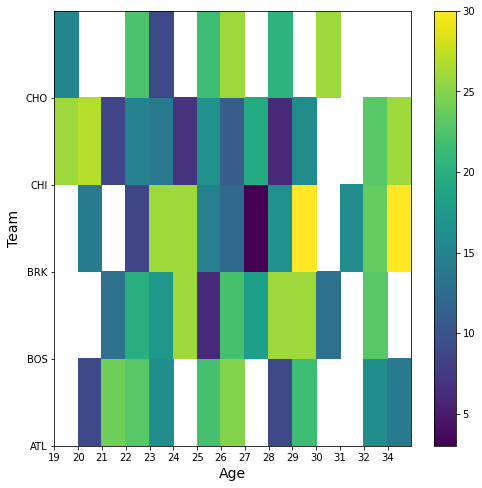

In [19]:
# 히트맵 시각화 V2

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

plt.pcolor(df2.values)

# x,y축 칼럼 설정
plt.xticks(range(len(df2.columns)), df2.columns)
plt.yticks(range(len(df2.index)), df2.index)
# x,y축 레이블 설정
plt.xlabel('Age', fontsize=14)
plt.ylabel('Team', fontsize=14)
plt.colorbar()
plt.show()

In [20]:
# 방사형 차트를 위한 인덱스 초기화

df3 = df1.reset_index()
df3.head() 

,Tm,ORB%,TRB%,AST%,BLK%,USG%
0,ATL,5.250000,10.400000,13.893750,1.718750,18.412500
1,BOS,5.681250,10.362500,12.881250,2.437500,18.325000
2,BRK,4.394737,10.547368,15.210526,2.147368,18.868421
3,CHI,4.482353,10.976471,13.500000,1.405882,17.582353
4,CHO,7.628571,11.742857,14.900000,2.764286,19.357143


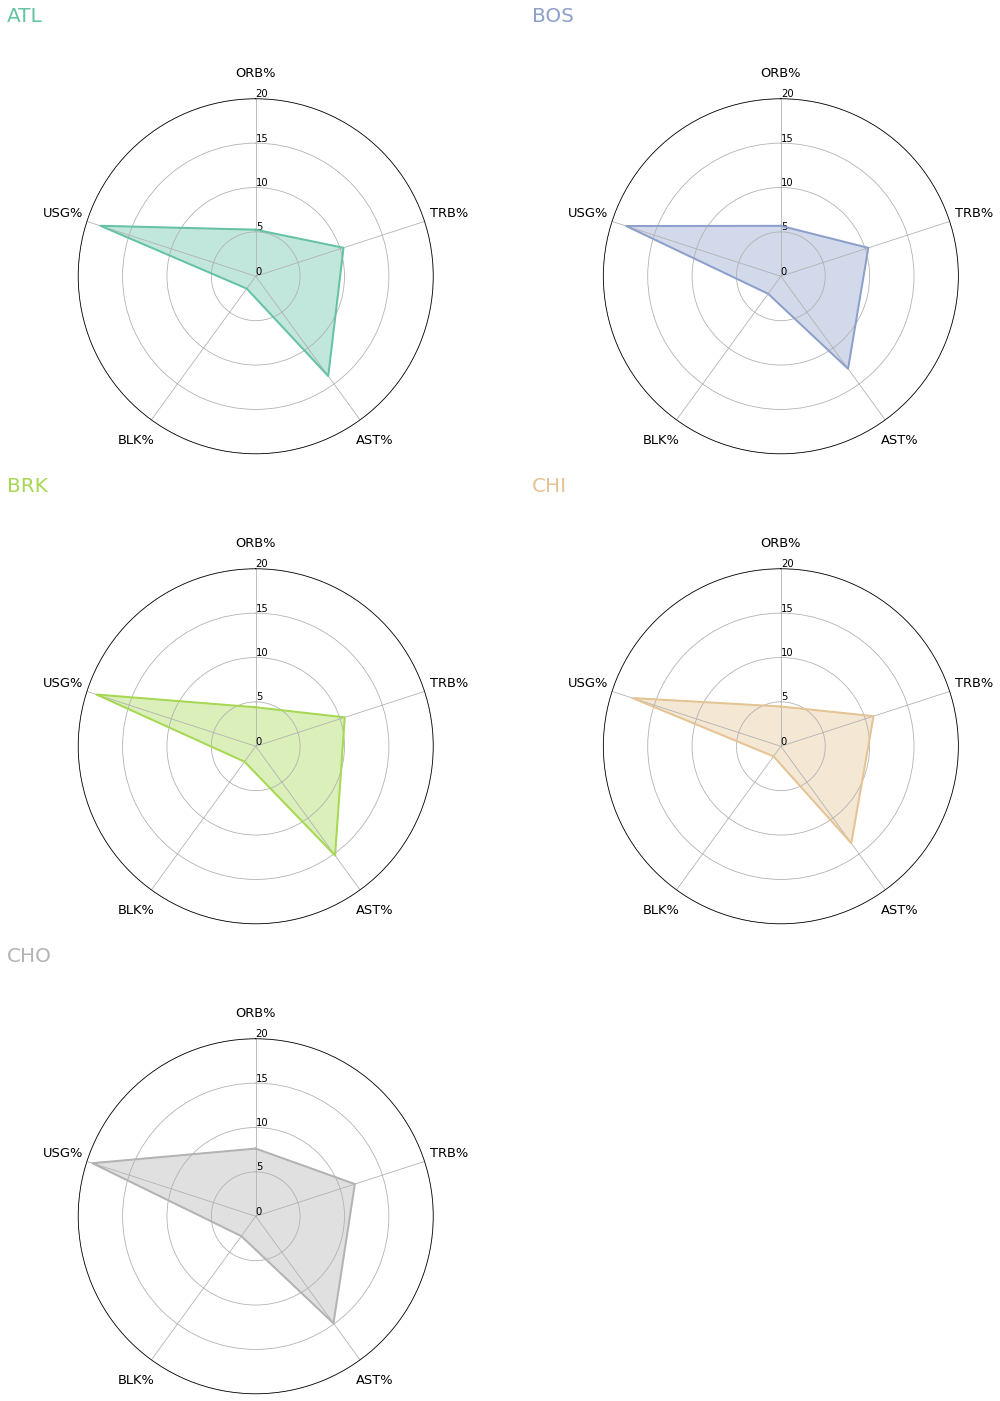

In [25]:
# 방사형 차트 - 하나씩 시각화

labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1] # 시작점 생성

my_palette = plt.cm.get_cmap('Set2', len(df3.index))

fig = plt.figure(figsize=(15,20))
fig.set_facecolor('white')

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]
    
    ax = plt.subplot(3, 2, i+1, polar=True)
    # 시작점 설정
    ax.set_theta_offset(pi/2)
    # 시계방향 설정
    ax.set_theta_direction(-1)
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)
    # 반지름 축 눈금 설정
    plt.yticks([0,5,10,15,20], ['0', '5', '10', '15', '20'], fontsize=10)
    plt.ylim(0, 20)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4)
    # 각 차트의 제목 생성
    plt.title(row.Tm, size=20, color=color, x=-0.2, y=1.2, ha='left')
    
# 차트 간 간격 설정
plt.tight_layout(pad=3)
plt.show()

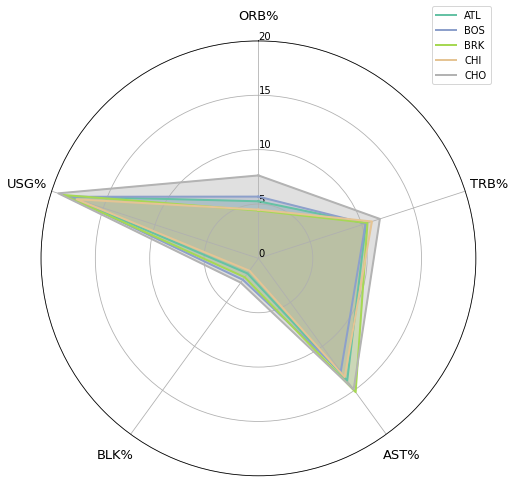

In [26]:
# 방사형 차트 - 한 번에 시각화

labels = df3.columns[1:]
num_labels = len(labels)

# 등분점 생성
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
angles += angles[:1] # 시작점 생성

my_palette = plt.cm.get_cmap('Set2', len(df3.index))

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

ax = fig.add_subplot(polar=True)

for i, row in df3.iterrows():
    color = my_palette(i)
    data = df3.iloc[i].drop('Tm').tolist()
    data += data[:1]
    
    # 시작점 설정
    ax.set_theta_offset(pi/2)
    # 시계방향 설정
    ax.set_theta_direction(-1)
    
    # 각도 축 눈금 생성
    plt.xticks(angles[:-1], labels, fontsize=13)
    # 각 축과 눈금 사이 여백 생성
    ax.tick_params(axis='x', which='major', pad=15)
    # 반지름 축 눈금 라벨 각도 0으로 설정
    ax.set_rlabel_position(0)
    # 반지름 축 눈금 설정
    plt.yticks([0,5,10,15,20], ['0', '5', '10', '15', '20'], fontsize=10)
    plt.ylim(0, 20)
    
    # 방사형 차트 출력
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Tm)
    # 도형 안쪽 색상 설정
    ax.fill(angles, data, color=color, alpha=0.4)

plt.legend(loc=(0.9, 0.9)) # 범례 추가
plt.show()

<AxesSubplot:>

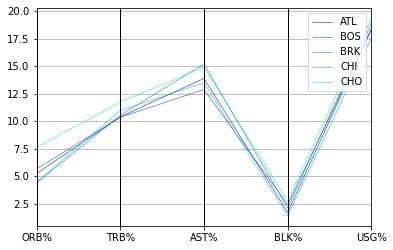

<Figure size 1152x576 with 0 Axes>

In [27]:
# 팀 기준 평행 좌표 그래프 생성

fig, axes = plt.subplots()
plt.figure(figsize=(16,8))
parallel_coordinates(df3, 'Tm', ax=axes, colormap='winter', linewidth='0.5')